In [24]:
import mlflow

runs = mlflow.search_runs("6")

basic_clfs_runs = mlflow.search_runs("7")

In [26]:
basic_clfs_runs['params.n_estimators'].unique()

array(['20'], dtype=object)

In [2]:
runs['params.n_rules'].unique()

array([None, '40', '20', '50', '5', '30', '10'], dtype=object)

In [3]:
DATASETS_FOR_CHECK = [
    'abalone',
    'breast',
    'glass',
    'yeast'
]

In [4]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import datetime 
import re

In [5]:
def get_filename(path):
    return path.split('/')[-1]

def create_train_test_concatenation(pdf):
    return pdf['params.test_path'].map(get_filename) + pdf['params.train_path'].map(get_filename) 

def get_dataset_name(train_path): 
    file_name = train_path.split('/')[-1]
    return re.sub("-train.*", "", file_name)

In [12]:
runs_fresh = runs[runs['start_time'] >= pd.to_datetime('2021 11 14', utc=True)]

In [13]:
len(runs_fresh)

517

In [14]:
runs_fresh = runs_fresh.query("status == 'FINISHED'")\
    .dropna(subset=['params.test_path', 'params.train_path'])

In [15]:
runs_fresh

run_id experiment_id    status  \
2    9e229a1b577244de910878a19fdfbf34             6  FINISHED   
3    9edc2fa5611d4606a8661f8421b1c74f             6  FINISHED   
4    32b10904879540509c78580b6311d5e2             6  FINISHED   
6    1ab8a14b94404c0aa33468aa4a2cc7d9             6  FINISHED   
8    b1546ce944344019b50dc1c883296158             6  FINISHED   
..                                ...           ...       ...   
512  b08c42b4effd42edbf26055742a0a836             6  FINISHED   
513  d9e50c0fd12240e5982619974cadbbc1             6  FINISHED   
514  0e238f215a93434f8d973af658cff568             6  FINISHED   
515  e5f8467381db45c1a150a111f8672113             6  FINISHED   
516  20a7dad75f7c4921b5913ce267d030fa             6  FINISHED   

                                          artifact_uri  \
2    file:///Users/bogdan.gulowaty/prywata/rules-em...   
3    file:///Users/bogdan.gulowaty/prywata/rules-em...   
4    file:///Users/bogdan.gulowaty/prywata/rules-em...   
6    file:///Users/bogdan.gulowaty/prywata/rules-em...   
8    file:///Users/bogdan.gulowaty/prywata/rules-em...   
..                                                 ...   
512  file:///Users/bogdan.gulowaty/prywata/rules-em...   
513  file:///Users/bogdan.gulowaty/prywata/rules-em...   
514  file:///Users/bogdan.gulowaty/prywata/rules-em...   
515  file:///Users/bogdan.gulowaty/prywata/rules-em...   
516  file:///Users/bogdan.gulowaty/prywata/rules-em...   

                          start_time                         end_time  \
2   2021-11-17 10:46:02.258000+00:00 2021-11-17 10:47:25.164000+00:00   
3   2021-11-17 10:45:02.687000+00:00 2021-11-17 10:45:56.249000+00:00   
4   2021-11-17 10:44:51.088000+00:00 2021-11-17 10:46:34.265000+00:00   
6   2021-11-17 10:43:23.163000+00:00 2021-11-17 10:44:44.788000+00:00   
8   2021-11-17 10:31:49.463000+00:00 2021-11-17 10:44:15.019000+00:00   
..                               ...                              ...   
512 2021-11-17 00:11:20.431000+00:00 2021-11-17 00:12:02.967000+00:00   
513 2021-11-17 00:10:38.930000+00:00 2021-11-17 00:11:15.515000+00:00   
514 2021-11-17 00:10:38.889000+00:00 2021-11-17 00:11:17.408000+00:00   
515 2021-11-17 00:10:38.780000+00:00 2021-11-17 00:11:23.481000+00:00   
516 2021-11-17 00:10:38.475000+00:00 2021-11-17 00:11:24.108000+00:00   

     metrics.best_model_acc params.pop_size params.max_depth  \
2                  0.830275              20                6   
3                  0.661972              20                6   
4                  0.794224              20                6   
6                  0.750000              20                6   
8                  0.982917              20                6   
..                      ...             ...              ...   
512                0.676056              20                6   
513                0.722222              20                6   
514                0.676056              20                6   
515                0.625000              20                6   
516                0.638889              20                6   

    params.cv_repeats  ...                                  params.train_path  \
2                   1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
3                   1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
4                   1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
6                   1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
8                   1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
..                ...  ...                                                ...   
512                 1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
513                 1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
514                 1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
515                 1  ...  /Users/bogdan.gulowaty/prywata/rules-embedding...   
516             

In [16]:
runs_fresh['file_name'] = runs_fresh['params.train_path'].apply(get_filename)
basic_clfs_runs['file_name'] = basic_clfs_runs['params.train_path'].apply(get_filename)
runs_fresh['dataset_name'] = runs_fresh['params.train_path'].apply(get_dataset_name)

runs_fresh = runs_fresh\
    .drop_duplicates(subset=['params.n_rules', 'file_name', 'params.cv_repeats', 'params.cv', 'params.n_gen', 'params.pop_size', 'params.algorithm'])
runs_fresh = runs_fresh[runs_fresh['dataset_name'].isin(DATASETS_FOR_CHECK)]

In [37]:
runs_fresh['params.n_rules'] = runs_fresh['params.n_rules'].astype(int)

In [48]:
values = runs_fresh.sort_values(['dataset_name', 'params.n_rules']).groupby(['dataset_name', 'params.n_rules'])['metrics.best_model_acc'].mean()

In [101]:
values

dataset_name  params.n_rules
abalone       5                 0.237664
              10                0.230958
              20                0.234389
              30                0.230238
              40                0.232633
              50                0.231832
breast        5                 0.635279
              10                0.664342
              20                0.608839
              30                0.628019
              40                0.640434
              50                0.624409
glass         5                 0.672905
              10                0.669775
              20                0.649583
              30                0.663667
              40                0.637150
              50                0.671340
yeast         5                 0.539306
              10                0.541336
              20                0.542906
              30                0.534360
              40                0.530784
              50            

In [75]:
from collections import defaultdict
param_by_dataset_values = defaultdict(list)

In [76]:
for dataset_name, param in values.index:
    param_by_dataset_values[dataset_name].append([param, values[(dataset_name, param)]])

In [77]:
dict(param_by_dataset_values)

{'abalone': [[5, 0.23766352156216802],
  [10, 0.23095785211076864],
  [20, 0.2343892455880854],
  [30, 0.23023773978495216],
  [40, 0.23263306440876536],
  [50, 0.23183209796970672]],
 'breast': [[5, 0.6352786868214638],
  [10, 0.6643421120980728],
  [20, 0.6088385018960054],
  [30, 0.6280193236714976],
  [40, 0.6404342631551607],
  [50, 0.6244091216040726]],
 'glass': [[5, 0.6729047122239611],
  [10, 0.6697748217701269],
  [20, 0.6495826812728221],
  [30, 0.6636671883150757],
  [40, 0.6371500608589811],
  [50, 0.671339766997044]],
 'yeast': [[5, 0.5393057884285954],
  [10, 0.5413355325636027],
  [20, 0.5429058920286991],
  [30, 0.5343602466409484],
  [40, 0.5307837711346484],
  [50, 0.5262862543564297]]}

In [58]:
%matplotlib inline

In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from palettable.colorbrewer.sequential import Greys_8 as MainColorMap
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [61]:
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }

In [62]:
plt.rcParams.update(params)

In [1]:
%matplotlib inline

In [96]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from palettable.colorbrewer.qualitative import Dark2_4 as MainColorMap
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [3]:
samples = np.array([[1,2], [2,3], [2,2], [3,6]])

In [4]:
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }

In [5]:
plt.rcParams.update(params)

In [65]:
params = {
   'axes.labelsize': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   }
mpl.rcParams.update(params)

In [86]:
cm = MainColorMap.get_mpl_colormap()

In [7]:
cm(10)

(0.9838523644752019, 0.9838523644752019, 0.9838523644752019, 1.0)

In [8]:
MainColorMap.mpl_colors

[(1.0, 1.0, 1.0),
 (0.9411764705882353, 0.9411764705882353, 0.9411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.45098039215686275, 0.45098039215686275, 0.45098039215686275),
 (0.3215686274509804, 0.3215686274509804, 0.3215686274509804),
 (0.1450980392156863, 0.1450980392156863, 0.1450980392156863)]

In [97]:
from itertools import cycle
def colormap_iterator():
    return cycle(MainColorMap.mpl_colors)

In [89]:
lines = cycle([
  'dashed',
    'dotted',
    'solid'
])

In [108]:
def basic_style(ax):
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.grid(linestyle = '--', linewidth=0.5,  clip_on=False, alpha=0.3)
#     ax.grid(which='minor', linestyle=':', alpha=0.2)


In [66]:

plt.rc('font', family='serif')
plt.rc('text', usetex=True)


In [99]:
cm_iter = colormap_iterator()

In [126]:
basic_clfs_runs['dataset_name'] = basic_clfs_runs['params.train_path'].apply(get_dataset_name)


In [121]:
basic_clfs_runs['params.n_estimators']

0      20
1      20
2      20
3      20
4      20
       ..
265    20
266    20
267    20
268    20
269    20
Name: params.n_estimators, Length: 270, dtype: object

In [128]:
base_clf_values = basic_clfs_runs[basic_clfs_runs['params.n_estimators'] == '20']\
    .groupby('dataset_name')['metrics.rf_acc'].mean()


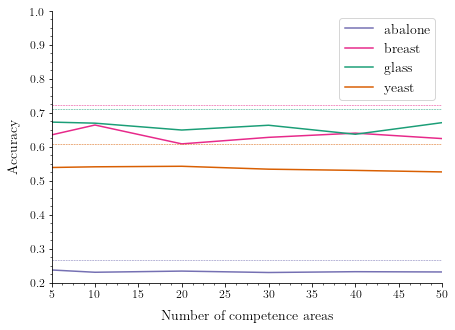

In [136]:
fig = plt.figure(figsize=(7, 5))
fig.tight_layout()

ax = fig.add_subplot(111)

for dataset_name, value_by_param in param_by_dataset_values.items():
    vals = np.array(value_by_param)
    color = next(cm_iter)
    ax.plot(vals[:,0], vals[:,1], label=dataset_name, color=color)
    ax.axhline(y=base_clf_values[dataset_name], color=color, linestyle='dashed', linewidth=0.5)
    

ax.set_xlim((5, 50))
ax.set_ylim((0.2, 1))
ax.set_ylabel('Accuracy',  labelpad=10)
ax.set_xlabel('Number of competence areas',  labelpad=10)
basic_style(ax)

ax.legend()

fig.savefig('s-param-comparison.pdf', bbox_inches='tight')

In [63]:
cm = MainColorMap.get_mpl_colormap()

In [9]:
from itertools import cycle
def colormap_iterator():
    return cycle(MainColorMap.mpl_colors)

In [11]:
hatches = cycle([
  '//',
    '\\\\',
    '//\\\\'
])

In [109]:
def basic_style(ax):
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.grid(linestyle = '--', linewidth=0.5,  clip_on=False, alpha=0.3)
#     ax.grid(which='minor', linestyle=':', alpha=0.2)


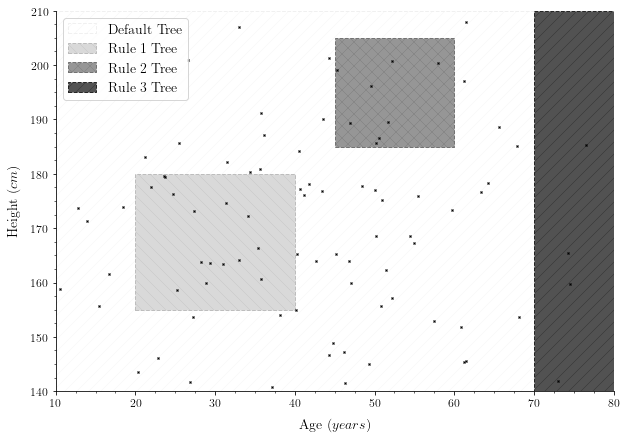

In [13]:


cm = colormap_iterator()

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
mpl.rcParams['hatch.linewidth'] = 0.3
# mpl.rcParams['hatch.linestyle'] = '--'
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

classification_samples = make_gaussian_quantiles(n_samples = 100, n_features = 2, n_classes = 2, random_state=42, mean = (45, 170), cov=400)[0]


fig = plt.figure(figsize=(10, 7))
fig.tight_layout()
ax = fig.add_subplot(111)
# ax.set_title("Ensemble trees competence areas")

ax.plot(samples[:, 0], samples[:, 1])

ax.set_ylabel('Height ($cm$)',  labelpad=10)
ax.set_xlabel('Age (${years}$)',  labelpad=10)
basic_style(ax)

ax.plot(classification_samples[:, 0], classification_samples[:, 1], marker='x', color = 'black', linewidth=0, markersize=2)

default = mpl.patches.Rectangle((10, 140), 70, 70, fill=True, label='Default Tree', alpha=1, linestyle = 'dashed', facecolor = next(cm), edgecolor=next(cm), clip_on=True, hatch=next(hatches))
ax.add_patch(default)

for name, rule_details in rules.items():
    rect = mpl.patches.Rectangle(rule_details[0], rule_details[1], rule_details[2], fill=True, label=name, alpha=1, linestyle = 'dashed', facecolor = next(cm), edgecolor=next(cm), clip_on=True, hatch=next(hatches))
    ax.add_patch(rect)


# ax.add_collection(patch_collection)
ax.legend(handles=ax.patches)

fig.savefig('competence_areas.pdf', bbox_inches='tight')

In [10]:
merged_runs = runs_fresh.merge(basic_clfs_runs, how='inner', on='file_name', suffixes=['', '_basic'])
merged_runs = merged_runs[[
                'run_id',
                'metrics.best_model_acc', 
             'params.pop_size', 
             'params.n_rules',
             'params.cv_repeats',
             'params.cv',
             'params.max_depth',
             'params.n_estimators',
             'metrics.dt_acc',
             'metrics.rf_acc',
             'params.test_path',
             'params.train_path'
            ]]

In [11]:
merged_runs.rename({
    'metrics.dt_acc_basic': 'metrics.dt_acc',
    'metrics.rf_acc_basic': 'metrics.rf_acc'
}, inplace=True, axis=1)

In [12]:
runs_fresh_with_acc = merged_runs\
    .assign(dt_acc_difference=lambda row: row['metrics.best_model_acc'] - row['metrics.dt_acc'])\
    .assign(rf_acc_difference=lambda row: row['metrics.best_model_acc'] - row['metrics.rf_acc'])
runs_fresh_with_acc

run_id  metrics.best_model_acc params.pop_size  \
0    590818025865418a9e3b250a2bffbffb                0.739812              20   
1    9344a7cfa92b43bb834e268f15f07636                0.532609              20   
2    9a353ebc3b5547a8aab4e811dc75ba80                0.783333              20   
3    d01a70159157412d91daf9bc5d492def                0.778846              20   
4    1b7b67512b904f7ebb1a4ba26878b872                0.960000              20   
..                                ...                     ...             ...   
265  a216f843ef014844b27f9324e4dc1c86                0.926240              20   
266  45ecb6cef5c744c2b4f2597ddeba540c                0.660661              20   
267  7c36f4a21dd94293bdca46c7e42fc809                0.829493              20   
268  3b21077a41b64096b5376cdf3dbe4baf                0.916667              20   
269  6c80cdab38924a5686e54b8ef4a450d1                0.990967              20   

    params.n_rules params.cv_repeats params.cv params.max_depth  \
0               20                 1         3                6   
1               20                 1         3                6   
2               20                 1         3                6   
3               20                 1         3                6   
4               20                 1         3                6   
..             ...               ...       ...              ...   
265             20                 1         3                6   
266             20                 1         3                6   
267             20                 1         3                6   
268             20                 1         3                6   
269             20                 1         3                6   

    params.n_estimators  metrics.dt_acc  metrics.rf_acc  \
0                    20        0.761755        0.843260   
1                    20        0.630435        0.684783   
2                    20        0.800000        1.000000   
3                    20        0.802885        0.870192   
4                    20        0.940000        0.960000   
..                  ...             ...             ...   
265                  20        0.913838        0.931462   
266                  20        0.705706        0.738739   
267                  20        0.829493        0.907834   
268                  20        0.881944        0.872222   
269                  20        1.000000        0.999469   

                                      params.test_path  \
0    /Users/bogdan.gulowaty/prywata/rules-embedding...   
1    /Users/bogdan.gulowaty/prywata/rules-embedding...   
2    /Users/bogdan.gulowaty/prywata/rules-embedding...   
3    /Users/bogdan.gulowaty/prywata/rules-embedding...   
4    /Users/bogdan.gulowaty/prywata/rules-embedding...   
..                                                 ...   
265  /Users/bogdan.gulowaty/prywata/rules-embedding...   
266  /Users/bogdan.gulowaty/prywata/rules-embedding...   
267  /Users/bogdan.gulowaty/prywata/rules-embedding...   
268  /Users/bogdan.gulowaty/prywata/rules-embedding...   
269  /Users/bogdan.gulowaty/prywata/rules-embedding...   

                                     params.train_path  dt_acc_difference  \
0    /Users/bogdan.gulowaty/prywata/rules-embedding...          -0.021944   
1    /Users/bogdan.gulowaty/prywata/rules-embedding...          -0.097826   
2    /Users/bogdan.gulowaty/prywata/rules-embedding...          -0.016667   
3    /Users/bogdan.gulowaty/prywata/rules-embedding...          -0.024038   
4    /Users/bogdan.gulowaty/prywata/rules-embedding...           0.020000   
..                                                 ...                ...   
265  /Users/bogdan.gulowaty/prywata/rules-embedding...           0.012402   
266  /Users/bogdan.gulowaty/prywata/rules-embedding...          -0.045045   
267  /Users/bogdan.gulowaty/prywata/rules-embedding...           0.000000   
268  /Users/bogdan.gulowaty/prywata/rules-embedding...           0.034722   


In [13]:
datasets_descriptions_df = pd.read_csv('../reports/datasets-descriptions.csv')

In [14]:
datasets_descriptions_df.set_index('file_name', inplace=True)

In [15]:
datasets_descriptions_df

name  features_count  classes_count   size  category  \
file_name                                                                  
chess              chess              36              1   3196        36   
yeast              yeast               8             10   1484         0   
adult              adult              14              1  45222         8   
ring                ring              20              2   7400         0   
page-blocks  page-blocks              10              5   5472         0   
...                  ...             ...            ...    ...       ...   
vowel              vowel              13             11    990         0   
splice            splice              60              3   3190        60   
letter            letter              16             26  20000         0   
phoneme          phoneme               5              2   5404         0   
penbased        penbased              16              1  10992         0   

             real  integer  unknown  
file_name                            
chess           0        0        0  
yeast           8        0        0  
adult           6        0        0  
ring           20        0        0  
page-blocks     4        6        0  
...           ...      ...      ...  
vowel          10        3        0  
splice          0        0        0  
letter          0       16        0  
phoneme         5        0        0  
penbased        0       16        0  

[68 rows x 8 columns]

# Extracting some data from paths

In [16]:
def get_dataset_name(train_path): 
    file_name = train_path.split('/')[-1]
    return re.sub("-train.*", "", file_name)

In [17]:
def get_dataset_shuffle(path):
    return re.search("-(?P<shuffle>\d)-s\d.csv", path).groupdict()['shuffle']

In [18]:
def get_dataset_split(path):
    return re.search("-\d-s(?P<split>\d).csv", path).groupdict()['split']

In [19]:
runs_fresh_with_acc['dataset_shuffle'] = runs_fresh_with_acc['params.train_path'].apply(get_dataset_shuffle)
runs_fresh_with_acc['dataset_split'] = runs_fresh_with_acc['params.train_path'].apply(get_dataset_split)

In [20]:
runs_fresh_with_acc['dataset_name'] = runs_fresh_with_acc['params.train_path'].apply(get_dataset_name)

In [21]:
SELECTED_DATASETS = list(set(['abalone',
 'balance',
 'breast',
 'car',
 'ecoli',
 'german',
 'glass',
 'haberman',
 'iris',
 'magic',
 'pima',
 'spambase',
 'tic-tac-toe',
 'zoo',
#  'shuttle',
 'adult',
#  'letter',
 'mammographic',
 'heart',
#  'marketing',
#  'segment',
#  'page-blocks',
#  'spectfheart',
 'yeast',
 'nursery',
 'saheart',
#  'optdigits',
 'chess',
#  'penbased',
 'mushroom',
'wine',
 'crx',
'connect-4',
'monk-2',
'thyroid',
'wdbc',
'shuttle'
                    ]))

In [22]:
runs_fresh_with_acc = runs_fresh_with_acc[runs_fresh_with_acc['dataset_name'].isin(SELECTED_DATASETS)]

In [23]:
runs_fresh_with_acc.groupby('dataset_name').count()['run_id']

dataset_name
abalone         9
adult           9
balance         9
breast          9
car             9
chess           9
connect-4       9
crx             9
ecoli           9
german          9
glass           9
haberman        9
heart           9
iris            9
magic           9
mammographic    9
monk-2          9
mushroom        9
nursery         9
pima            9
saheart         9
shuttle         9
spambase        9
thyroid         9
tic-tac-toe     9
wdbc            9
wine            9
yeast           9
zoo             9
Name: run_id, dtype: int64

# Metrics Calculation

In [24]:
runs_fresh_with_acc['better_than_dt'] = runs_fresh_with_acc['metrics.best_model_acc'] > runs_fresh_with_acc['metrics.dt_acc']
runs_fresh_with_acc['better_or_equal_rf'] = runs_fresh_with_acc['metrics.best_model_acc'] >= runs_fresh_with_acc['metrics.rf_acc']
runs_fresh_with_acc['better_than_rf'] = runs_fresh_with_acc['metrics.best_model_acc'] > runs_fresh_with_acc['metrics.rf_acc']
runs_fresh_with_acc['rf_difference'] = runs_fresh_with_acc['metrics.best_model_acc'] - runs_fresh_with_acc['metrics.rf_acc']
runs_fresh_with_acc['dt_difference'] = runs_fresh_with_acc['metrics.best_model_acc'] - runs_fresh_with_acc['metrics.dt_acc']
runs_fresh_with_acc['better_dt_but_worse_rf'] = (runs_fresh_with_acc['better_than_dt']==True) & (runs_fresh_with_acc['better_or_equal_rf']==True)
runs_fresh_with_acc['dt_acc_degradation'] = runs_fresh_with_acc['metrics.dt_acc'] - runs_fresh_with_acc['metrics.best_model_acc']
runs_fresh_with_acc['rf_acc_degradation'] = runs_fresh_with_acc['metrics.rf_acc'] - runs_fresh_with_acc['metrics.best_model_acc']

/var/folders/d8/gtqn_tmx2t9dknz96vplqj9w0000gn/T/ipykernel_33378/2281420757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_fresh_with_acc['better_than_dt'] = runs_fresh_with_acc['metrics.best_model_acc'] > runs_fresh_with_acc['metrics.dt_acc']
/var/folders/d8/gtqn_tmx2t9dknz96vplqj9w0000gn/T/ipykernel_33378/2281420757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_fresh_with_acc['better_or_equal_rf'] = runs_fresh_with_acc['metrics.best_model_acc'] >= runs_fresh_with_acc['metrics.rf_acc']

## Join with datasets descriptions

In [25]:
runs_fresh_with_acc = runs_fresh_with_acc.join(datasets_descriptions_df, on='dataset_name')

### Calculate features fractions

In [26]:
runs_fresh_with_acc['total_features'] = runs_fresh_with_acc.real + runs_fresh_with_acc.integer + runs_fresh_with_acc.category + runs_fresh_with_acc.unknown

In [27]:
runs_fresh_with_acc['integer_features_fraction'] = runs_fresh_with_acc['integer'] / runs_fresh_with_acc['total_features']
runs_fresh_with_acc['real_features_fraction'] = runs_fresh_with_acc['real'] / runs_fresh_with_acc['total_features']
runs_fresh_with_acc['category_features_fraction'] = runs_fresh_with_acc['category'] / runs_fresh_with_acc['total_features']


# Results summary

## Impact of dataset feature types on acc

In [28]:
# !pip install sear

In [29]:
# import seaborn as sns

In [30]:
# sns.heatmap(runs_fresh_with_acc[['rf_difference', 'dt_difference', 'integer_features_fraction', 'real_features_fraction', 'category_features_fraction']].corr())

In [31]:
def decide_on_type_of_dataset(x):
    if x['category_features_fraction'] == 0:
        return 'numerical'
    if x['category_features_fraction'] == 1:
        return 'categorical'
    if x['category_features_fraction'] <= 0.5:
        return "mostly-numerical"
    if x['category_features_fraction'] > 0.5:
        return "mostly-categorical"
        

In [32]:
runs_fresh_with_acc['dataset_type'] = runs_fresh_with_acc.apply(decide_on_type_of_dataset,axis='columns')

In [33]:
display("Distribution")
runs_fresh_with_acc.groupby('dataset_type')['run_id'].count()

'Distribution'

dataset_type
categorical            72
mostly-categorical     27
mostly-numerical       18
numerical             144
Name: run_id, dtype: int64

In [34]:
runs_fresh_with_acc.groupby('dataset_type')['dt_acc_degradation'].mean()

dataset_type
categorical           0.008447
mostly-categorical    0.019308
mostly-numerical      0.026058
numerical             0.018386
Name: dt_acc_degradation, dtype: float64

In [35]:
runs_fresh_with_acc.groupby('dataset_type')['rf_acc_degradation'].mean()

dataset_type
categorical           0.025757
mostly-categorical    0.037890
mostly-numerical      0.060744
numerical             0.055202
Name: rf_acc_degradation, dtype: float64

In [36]:
runs_fresh_with_acc.groupby('dataset_type')['better_than_dt'].mean()

dataset_type
categorical           0.444444
mostly-categorical    0.074074
mostly-numerical      0.000000
numerical             0.263889
Name: better_than_dt, dtype: float64

In [37]:
runs_fresh_with_acc.groupby('dataset_type')['better_or_equal_rf'].mean()

dataset_type
categorical           0.402778
mostly-categorical    0.000000
mostly-numerical      0.000000
numerical             0.090278
Name: better_or_equal_rf, dtype: float64

## Impact of dataset size and classes count 

In [38]:
runs_fresh_with_acc.classes_count.unique()

array([ 2,  1,  3, 28,  7, 10,  5])

In [39]:
def discretize_classes_count(x):
    if x['classes_count'] == 2:
        return 'binary'
    if x['classes_count'] < 6:
        return '2<c<6'
    if x['classes_count'] < 11:
        return "6<=c<11"
    if x['classes_count'] < 20:
        return "11<=c<20"
    if x['classes_count'] < 30:
        return "20<=c<30"
    return "big"
        

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

In [41]:
dataset_size_discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal')
dataset_size_discretizer.fit(runs_fresh_with_acc['size'].to_numpy().reshape(-1, 1))

KBinsDiscretizer(encode='ordinal', n_bins=6)

In [42]:
dataset_size_discretizer.n_bins_

array([6])

In [43]:
for single_bin in range(dataset_size_discretizer.n_bins_[0]):
        print(f"bin={single_bin}, przedzial {dataset_size_discretizer.bin_edges_[0][single_bin]}<n<={dataset_size_discretizer.bin_edges_[0][single_bin+1]}\n")

bin=0, przedzial 101.0<n<=270.0

bin=1, przedzial 270.0<n<=462.0

bin=2, przedzial 462.0<n<=830.0

bin=3, przedzial 830.0<n<=3196.0

bin=4, przedzial 3196.0<n<=12960.0

bin=5, przedzial 12960.0<n<=67557.0



In [44]:
dataset_size_discretizer.bin_edges_

array([array([  101.,   270.,   462.,   830.,  3196., 12960., 67557.])],
      dtype=object)

In [45]:
dataset_size_discretizer.transform([[5000]])[0][0]

4.0

In [46]:
def discretize_dataset_size(x):
    single_bin = int(dataset_size_discretizer.transform([[x['size']]])[0][0])
    return f"{int(dataset_size_discretizer.bin_edges_[0][single_bin])}-{int(dataset_size_discretizer.bin_edges_[0][single_bin+1])}"


In [47]:
runs_fresh_with_acc['classes_count_level'] = runs_fresh_with_acc.apply(discretize_classes_count,axis='columns')

In [48]:
runs_fresh_with_acc['dataset_size_level'] = runs_fresh_with_acc.apply(discretize_dataset_size,axis='columns')

In [49]:
runs_fresh_with_acc.groupby('classes_count_level')['run_id'].count()

classes_count_level
20<=c<30      9
2<c<6       117
6<=c<11      27
binary      108
Name: run_id, dtype: int64

In [50]:
runs_fresh_with_acc.groupby('classes_count_level')['dt_acc_degradation'].mean()

classes_count_level
20<=c<30    0.019647
2<c<6       0.015345
6<=c<11     0.015815
binary      0.017100
Name: dt_acc_degradation, dtype: float64

In [51]:
runs_fresh_with_acc.groupby('classes_count_level')['rf_acc_degradation'].mean()

classes_count_level
20<=c<30    0.032742
2<c<6       0.037928
6<=c<11     0.041693
binary      0.056130
Name: rf_acc_degradation, dtype: float64

In [52]:
runs_fresh_with_acc.groupby('classes_count_level')['better_than_dt'].mean()

classes_count_level
20<=c<30    0.000000
2<c<6       0.350427
6<=c<11     0.074074
binary      0.268519
Name: better_than_dt, dtype: float64

In [53]:
runs_fresh_with_acc.groupby('classes_count_level')['better_or_equal_rf'].mean()

classes_count_level
20<=c<30    0.000000
2<c<6       0.290598
6<=c<11     0.185185
binary      0.027778
Name: better_or_equal_rf, dtype: float64

In [54]:
runs_fresh_with_acc.groupby('dataset_size_level')['run_id'].count()

dataset_size_level
101-270        36
12960-67557    45
270-462        45
3196-12960     45
462-830        45
830-3196       45
Name: run_id, dtype: int64

In [55]:
runs_fresh_with_acc.groupby('dataset_size_level')['dt_acc_degradation'].mean()

dataset_size_level
101-270        0.037872
12960-67557   -0.005199
270-462        0.041237
3196-12960     0.002204
462-830        0.009957
830-3196       0.015861
Name: dt_acc_degradation, dtype: float64

In [56]:
runs_fresh_with_acc.groupby('dataset_size_level')['rf_acc_degradation'].mean()

dataset_size_level
101-270        0.085743
12960-67557   -0.010288
270-462        0.084796
3196-12960     0.012298
462-830        0.060650
830-3196       0.048839
Name: rf_acc_degradation, dtype: float64

In [57]:
runs_fresh_with_acc.groupby('dataset_size_level')['better_than_dt'].mean()

dataset_size_level
101-270        0.222222
12960-67557    0.400000
270-462        0.200000
3196-12960     0.266667
462-830        0.333333
830-3196       0.222222
Name: better_than_dt, dtype: float64

In [58]:
runs_fresh_with_acc.groupby('dataset_size_level')['better_or_equal_rf'].mean()

dataset_size_level
101-270        0.111111
12960-67557    0.533333
270-462        0.022222
3196-12960     0.111111
462-830        0.022222
830-3196       0.155556
Name: better_or_equal_rf, dtype: float64

## General summaries

In [59]:
display(Markdown("### Percentage of better_or_equal_rf and not better than rf"))
display(runs_fresh_with_acc.query("better_or_equal_rf == True and better_than_dt == False").count()['run_id'] / runs_fresh_with_acc.count()['run_id'])

### Percentage of better_or_equal_rf and not better than rf

0.04980842911877394

In [60]:
values_to_plot = {}

In [61]:
def add_to_plot(groupby_df, name):
    total = groupby_df[False] + groupby_df[True]
    
    values_to_plot[name] = [groupby_df[True] / total, groupby_df[False] / total]

In [62]:
add_to_plot(runs_fresh_with_acc.groupby(['better_than_dt'])['run_id'].count(), "BetterThanDF")
runs_fresh_with_acc.groupby(['better_than_dt'])['run_id'].count()

better_than_dt
False    189
True      72
Name: run_id, dtype: int64

In [63]:
runs_fresh_with_acc['better_than_dt'].std()

0.4478063241835469

In [64]:
add_to_plot(runs_fresh_with_acc.groupby(['better_or_equal_rf'])['run_id'].count(), "Better or equal RF")
runs_fresh_with_acc.groupby(['better_or_equal_rf'])['run_id'].count()

better_or_equal_rf
False    219
True      42
Name: run_id, dtype: int64

In [65]:
runs_fresh_with_acc['better_or_equal_rf'].std()

0.3681626903669753

In [66]:
add_to_plot(runs_fresh_with_acc.groupby(['better_than_rf'])['run_id'].count(), "Better than RF")
runs_fresh_with_acc.groupby(['better_than_rf'])['run_id'].count()

better_than_rf
False    223
True      38
Name: run_id, dtype: int64

In [67]:
values_to_plot

{'BetterThanDF': [0.27586206896551724, 0.7241379310344828],
 'Better or equal RF': [0.16091954022988506, 0.8390804597701149],
 'Better than RF': [0.14559386973180077, 0.8544061302681992]}

## WIlcoxon signed rank test

In [68]:
from scipy.stats import wilcoxon

In [69]:
def calculate_wilcoxon_pval(a, b):
    return wilcoxon(a, b, zero_method='zsplit')[1]

In [70]:
statistical_test_results = runs_fresh_with_acc[['dataset_name', 'dataset_shuffle', 'dataset_split', 'metrics.best_model_acc', 'metrics.rf_acc', 'metrics.dt_acc']]\
    .sort_values(['dataset_shuffle', 'dataset_split'])\
    .groupby('dataset_name')\
    .apply(lambda x: pd.Series(
        {
            'rf_vs_method': calculate_wilcoxon_pval(x['metrics.rf_acc'], x['metrics.best_model_acc']),
            'rf_vs_dt': calculate_wilcoxon_pval(x['metrics.dt_acc'], x['metrics.rf_acc']),
            'dt_vs_method': calculate_wilcoxon_pval(x['metrics.dt_acc'], x['metrics.best_model_acc']),
            'rf_mean_acc': x['metrics.rf_acc'].mean(),
            'dt_mean_acc': x['metrics.dt_acc'].mean(),
            'method_mean_acc': x['metrics.best_model_acc'].mean()
        }
    ))

/Users/bogdan.gulowaty/prywata/rules-embedding-forest-reduction/.venv/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/bogdan.gulowaty/prywata/rules-embedding-forest-reduction/.venv/lib/python3.9/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [71]:
accuracy_means_by_dataset = runs_fresh_with_acc[['dataset_name', 'dataset_shuffle', 'dataset_split', 'metrics.best_model_acc', 'metrics.rf_acc', 'metrics.dt_acc']]\
    .groupby('dataset_name')\
    .mean()

In [72]:
accuracy_means_by_dataset

metrics.best_model_acc  metrics.rf_acc  metrics.dt_acc
dataset_name                                                        
abalone                     0.234389        0.267132        0.254037
adult                       0.842068        0.846535        0.848525
balance                     0.771771        0.854962        0.781898
breast                      0.608839        0.722131        0.695470
car                         0.916860        0.890818        0.881173
chess                       0.950669        0.957238        0.935753
connect-4                   0.692921        0.667017        0.692669
crx                         0.814710        0.866242        0.830496
ecoli                       0.694444        0.823413        0.770833
german                      0.680996        0.738667        0.716678
glass                       0.649583        0.710333        0.674535
haberman                    0.674292        0.739651        0.705882
heart                       0.703704        0.806173        0.691358
iris                        0.931111        0.942222        0.926667
magic                       0.838205        0.844479        0.840396
mammographic                0.782709        0.827677        0.806003
monk-2                      0.976080        0.989969        1.000000
mushroom                    0.997343        0.999173        1.000000
nursery                     0.922377        0.886008        0.887731
pima                        0.706163        0.767795        0.703993
saheart                     0.616883        0.705628        0.649351
shuttle                     0.999241        0.999333        0.999494
spambase                    0.914655        0.930607        0.912406
thyroid                     0.989259        0.993657        0.995139
tic-tac-toe                 0.760943        0.864305        0.794721
wdbc                        0.932071        0.950221        0.925644
wine                        0.775612        0.977401        0.876585
yeast                       0.542906        0.607143        0.565145
zoo                         0.907506        0.976827        0.937512

In [73]:
stds_by_dataset = runs_fresh_with_acc[['dataset_name', 'dataset_shuffle', 'dataset_split', 'metrics.best_model_acc', 'metrics.rf_acc', 'metrics.dt_acc']]\
    .groupby('dataset_name')\
    .std()
stds_by_dataset

metrics.best_model_acc  metrics.rf_acc  metrics.dt_acc
dataset_name                                                        
abalone                     0.009792        0.008592        0.015665
adult                       0.001404        0.001185        0.001903
balance                     0.022455        0.019946        0.037499
breast                      0.054353        0.042200        0.048209
car                         0.010753        0.013600        0.006266
chess                       0.009543        0.010007        0.005698
connect-4                   0.001621        0.001217        0.000947
crx                         0.014568        0.031475        0.029455
ecoli                       0.033341        0.055719        0.062020
german                      0.013763        0.014813        0.020388
glass                       0.022230        0.034608        0.041884
haberman                    0.020079        0.015587        0.035007
heart                       0.072860        0.028927        0.050546
iris                        0.030185        0.018559        0.030000
magic                       0.001735        0.003993        0.003730
mammographic                0.021822        0.032437        0.027864
monk-2                      0.014777        0.010481        0.000000
mushroom                    0.003633        0.001704        0.000000
nursery                     0.005496        0.009909        0.003978
pima                        0.022759        0.018745        0.030557
saheart                     0.014152        0.034818        0.020534
shuttle                     0.000280        0.000140        0.000248
spambase                    0.008793        0.004367        0.006001
thyroid                     0.003428        0.004438        0.000908
tic-tac-toe                 0.031836        0.011974        0.029620
wdbc                        0.015122        0.016022        0.023939
wine                        0.073669        0.028107        0.043141
yeast                       0.016959        0.016725        0.016033
zoo                         0.031554        0.013144        0.034086

In [74]:
statistical_test_results

rf_vs_method  rf_vs_dt  dt_vs_method  rf_mean_acc  dt_mean_acc  \
dataset_name                                                                   
abalone           0.003906  0.019531      0.003906     0.267132     0.254037   
adult             0.003906  0.003906      0.003906     0.846535     0.848525   
balance           0.003906  0.003906      0.300781     0.854962     0.781898   
breast            0.003906  0.074219      0.003906     0.722131     0.695470   
car               0.027344  0.054688      0.003906     0.890818     0.881173   
chess             0.300781  0.003906      0.019531     0.957238     0.935753   
connect-4         0.003906  0.003906      0.570312     0.667017     0.692669   
crx               0.003906  0.007812      0.095146     0.866242     0.830496   
ecoli             0.003906  0.003906      0.003906     0.823413     0.770833   
german            0.003906  0.019531      0.003906     0.738667     0.716678   
glass             0.003906  0.027344      0.164062     0.710333     0.674535   
haberman          0.003906  0.012538      0.019531     0.739651     0.705882   
heart             0.003906  0.003906      0.570312     0.806173     0.691358   
iris              0.168520  0.042717      0.480406     0.942222     0.926667   
magic             0.007812  0.054688      0.128906     0.844479     0.840396   
mammographic      0.003906  0.003906      0.003906     0.827677     0.806003   
monk-2            0.008789  0.019879      0.003906     0.989969     1.000000   
mushroom          0.074219  0.036136      0.003906     0.999173     1.000000   
nursery           0.003906  0.496094      0.003906     0.886008     0.887731   
pima              0.003906  0.003906      1.000000     0.767795     0.703993   
saheart           0.003906  0.003906      0.003906     0.705628     0.649351   
shuttle           0.425781  0.164062      0.003906     0.999333     0.999494   
spambase          0.003906  0.003906      0.652344     0.930607     0.912406   
thyroid           0.074219  0.820312      0.003906     0.993657     0.995139   
tic-tac-toe       0.003906  0.003906      0.019531     0.864305     0.794721   
wdbc              0.007812  0.012616      0.812218     0.950221     0.925644   
wine              0.003906  0.012616      0.019531     0.977401     0.876585   
yeast             0.003906  0.003906      0.003906     0.607143     0.565145   
zoo               0.003906  0.020211      0.141894     0.976827     0.937512   

              method_mean_acc  
dataset_name                   
abalone              0.234389  
adult                0.842068  
balance              0.771771  
breast               0.608839  
car                  0.916860  
chess                0.950669  
connect-4            0.692921  
crx                  0.814710  
ecoli                0.694444  
german               0.680996  
glass                0.649583  
haberman             0.674292  
heart                0.703704  
iris                 0.931111  
magic                0.838205  
mammographic         0.782709  
monk-2               0.976080  
mushroom             0.997343  
nursery              0.922377  
pima                 0.706163  
saheart              0.616883  
shuttle              0.999241  
spambase             0.914655  
thyroid              0.989259  
tic-tac-toe          0.760943  
wdbc                 0.932071  
wine                 0.775612  
yeast                0.542906  
zoo                  0.907506

In [75]:
statistical_test_results_005 = statistical_test_results.applymap(lambda pval: pval < 0.05)
statistical_test_results_005

rf_vs_method  rf_vs_dt  dt_vs_method  rf_mean_acc  dt_mean_acc  \
dataset_name                                                                   
abalone               True      True          True        False        False   
adult                 True      True          True        False        False   
balance               True      True         False        False        False   
breast                True     False          True        False        False   
car                   True     False          True        False        False   
chess                False      True          True        False        False   
connect-4             True      True         False        False        False   
crx                   True      True         False        False        False   
ecoli                 True      True          True        False        False   
german                True      True          True        False        False   
glass                 True      True         False        False        False   
haberman              True      True          True        False        False   
heart                 True      True         False        False        False   
iris                 False      True         False        False        False   
magic                 True     False         False        False        False   
mammographic          True      True          True        False        False   
monk-2                True      True          True        False        False   
mushroom             False      True          True        False        False   
nursery               True     False          True        False        False   
pima                  True      True         False        False        False   
saheart               True      True          True        False        False   
shuttle              False     False          True        False        False   
spambase              True      True         False        False        False   
thyroid              False     False          True        False        False   
tic-tac-toe           True      True          True        False        False   
wdbc                  True      True         False        False        False   
wine                  True      True          True        False        False   
yeast                 True      True          True        False        False   
zoo                   True      True         False        False        False   

              method_mean_acc  
dataset_name                   
abalone                 False  
adult                   False  
balance                 False  
breast                  False  
car                     False  
chess                   False  
connect-4               False  
crx                     False  
ecoli                   False  
german                  False  
glass                   False  
haberman                False  
heart                   False  
iris                    False  
magic                   False  
mammographic            False  
monk-2                  False  
mushroom                False  
nursery                 False  
pima                    False  
saheart                 False  
shuttle                 False  
spambase                False  
thyroid                 False  
tic-tac-toe             False  
wdbc                    False  
wine                    False  
yeast                   False  
zoo                     False

# publication ready preparations
## Stat testsfrom collections import OrderedDict


In [76]:
from collections import OrderedDict

def to_roman(num):

    roman = OrderedDict()
    roman[1000] = "M"
    roman[900] = "CM"
    roman[500] = "D"
    roman[400] = "CD"
    roman[100] = "C"
    roman[90] = "XC"
    roman[50] = "L"
    roman[40] = "XL"
    roman[10] = "X"
    roman[9] = "IX"
    roman[5] = "V"
    roman[4] = "IV"
    roman[1] = "I"

    def roman_num(num):
        for r in roman.keys():
            x, y = divmod(num, r)
            yield roman[r] * x
            num -= (r * x)
            if num <= 0:
                break

    return "".join([a for a in roman_num(num)])

In [77]:
set(range(len([1,3,4])))

{0, 1, 2}

In [78]:
statistical_test_results

rf_vs_method  rf_vs_dt  dt_vs_method  rf_mean_acc  dt_mean_acc  \
dataset_name                                                                   
abalone           0.003906  0.019531      0.003906     0.267132     0.254037   
adult             0.003906  0.003906      0.003906     0.846535     0.848525   
balance           0.003906  0.003906      0.300781     0.854962     0.781898   
breast            0.003906  0.074219      0.003906     0.722131     0.695470   
car               0.027344  0.054688      0.003906     0.890818     0.881173   
chess             0.300781  0.003906      0.019531     0.957238     0.935753   
connect-4         0.003906  0.003906      0.570312     0.667017     0.692669   
crx               0.003906  0.007812      0.095146     0.866242     0.830496   
ecoli             0.003906  0.003906      0.003906     0.823413     0.770833   
german            0.003906  0.019531      0.003906     0.738667     0.716678   
glass             0.003906  0.027344      0.164062     0.710333     0.674535   
haberman          0.003906  0.012538      0.019531     0.739651     0.705882   
heart             0.003906  0.003906      0.570312     0.806173     0.691358   
iris              0.168520  0.042717      0.480406     0.942222     0.926667   
magic             0.007812  0.054688      0.128906     0.844479     0.840396   
mammographic      0.003906  0.003906      0.003906     0.827677     0.806003   
monk-2            0.008789  0.019879      0.003906     0.989969     1.000000   
mushroom          0.074219  0.036136      0.003906     0.999173     1.000000   
nursery           0.003906  0.496094      0.003906     0.886008     0.887731   
pima              0.003906  0.003906      1.000000     0.767795     0.703993   
saheart           0.003906  0.003906      0.003906     0.705628     0.649351   
shuttle           0.425781  0.164062      0.003906     0.999333     0.999494   
spambase          0.003906  0.003906      0.652344     0.930607     0.912406   
thyroid           0.074219  0.820312      0.003906     0.993657     0.995139   
tic-tac-toe       0.003906  0.003906      0.019531     0.864305     0.794721   
wdbc              0.007812  0.012616      0.812218     0.950221     0.925644   
wine              0.003906  0.012616      0.019531     0.977401     0.876585   
yeast             0.003906  0.003906      0.003906     0.607143     0.565145   
zoo               0.003906  0.020211      0.141894     0.976827     0.937512   

              method_mean_acc  
dataset_name                   
abalone              0.234389  
adult                0.842068  
balance              0.771771  
breast               0.608839  
car                  0.916860  
chess                0.950669  
connect-4            0.692921  
crx                  0.814710  
ecoli                0.694444  
german               0.680996  
glass                0.649583  
haberman             0.674292  
heart                0.703704  
iris                 0.931111  
magic                0.838205  
mammographic         0.782709  
monk-2               0.976080  
mushroom             0.997343  
nursery              0.922377  
pima                 0.706163  
saheart              0.616883  
shuttle              0.999241  
spambase             0.914655  
thyroid              0.989259  
tic-tac-toe          0.760943  
wdbc                 0.932071  
wine                 0.775612  
yeast                0.542906  
zoo                  0.907506

In [79]:
def to_roman_if_significant(row, methods, value_suffix = "_mean_acc", separator = "_vs_", confidence_value = 0.05):
    out = {}
    
    for method in methods:
        this_value = row[f"{method}{value_suffix}"]
        better_than = []
        other_methods = set(methods).difference({method})
        for other_method in other_methods:
            other_method_value = row[f"{other_method}{value_suffix}"]
            difference_p_value = row[f"{method}{separator}{other_method}"] if f"{method}{separator}{other_method}" in row else row[f"{other_method}{separator}{method}"]
            if this_value > other_method_value and difference_p_value < confidence_value:
                better_than.append(other_method)
        out[method] = better_than
        
    final_out = {}
    
    roman_idx_by_method = {
        method: to_roman(list(out.keys()).index(method) + 1) for method in methods 
    }
    
    for method, better_than in out.items():
        final_out[method] = ",".join([roman_idx_by_method[other_method] for other_method in better_than]).strip(",")
            
    return pd.Series(final_out)

In [80]:
statistical_test_with_romans = statistical_test_results.apply(lambda row: to_roman_if_significant(row, ['method', 'rf', 'dt']), axis='columns')
statistical_test_with_romans.rename(columns={
    "method": "metrics.best_model_acc",
    "rf": "metrics.rf_acc",
    "dt": "metrics.dt_acc"
})

metrics.best_model_acc metrics.rf_acc metrics.dt_acc
dataset_name                                                     
abalone                                      III,I              I
adult                                            I           I,II
balance                                      III,I               
breast                                           I              I
car                          III,II                              
chess                           III            III               
connect-4                        II                            II
crx                                          III,I               
ecoli                                        III,I              I
german                                       III,I              I
glass                                        III,I               
haberman                                     III,I              I
heart                                        III,I               
iris                                           III               
magic                                            I               
mammographic                                 III,I              I
monk-2                                           I           I,II
mushroom                                                     I,II
nursery                      III,II                              
pima                                         III,I               
saheart                                      III,I              I
shuttle                                                         I
spambase                                     III,I               
thyroid                                                         I
tic-tac-toe                                  III,I              I
wdbc                                         III,I               
wine                                         III,I              I
yeast                                        III,I              I
zoo                                          III,I

In [81]:
def round_string(val):
    return np.round(float(val)*100, 2)

In [87]:
output_table = pd.concat([
    accuracy_means_by_dataset,
    stds_by_dataset,
statistical_test_with_romans.rename(columns={
    "method": "metrics.best_model_acc",
    "rf": "metrics.rf_acc",
    "dt": "metrics.dt_acc"
})
]).astype(str).groupby(level=0).agg(lambda strings: f"{round_string(strings[0])} ({round_string(strings[1])}) {strings[2]}" )

output_table.to_csv('results-with-20-size.csv')
output_table

metrics.best_model_acc      metrics.rf_acc     metrics.dt_acc
dataset_name                                                              
abalone               23.44 (0.98)   26.71 (0.86) III,I      25.4 (1.57) I
adult                 84.21 (0.14)       84.65 (0.12) I  84.85 (0.19) I,II
balance               77.18 (2.25)    85.5 (1.99) III,I      78.19 (3.75) 
breast                60.88 (5.44)       72.21 (4.22) I     69.55 (4.82) I
car             91.69 (1.08) III,II       89.08 (1.36)       88.12 (0.63) 
chess              95.07 (0.95) III     95.72 (1.0) III      93.58 (0.57) 
connect-4           69.29 (0.16) II        66.7 (0.12)     69.27 (0.09) II
crx                   81.47 (1.46)   86.62 (3.15) III,I      83.05 (2.95) 
ecoli                 69.44 (3.33)   82.34 (5.57) III,I      77.08 (6.2) I
german                 68.1 (1.38)   73.87 (1.48) III,I     71.67 (2.04) I
glass                 64.96 (2.22)   71.03 (3.46) III,I      67.45 (4.19) 
haberman              67.43 (2.01)   73.97 (1.56) III,I      70.59 (3.5) I
heart                 70.37 (7.29)   80.62 (2.89) III,I      69.14 (5.05) 
iris                  93.11 (3.02)     94.22 (1.86) III       92.67 (3.0) 
magic                 83.82 (0.17)        84.45 (0.4) I      84.04 (0.37) 
mammographic          78.27 (2.18)   82.77 (3.24) III,I      80.6 (2.79) I
monk-2                97.61 (1.48)        99.0 (1.05) I   100.0 (0.0) I,II
mushroom              99.73 (0.36)        99.92 (0.17)    100.0 (0.0) I,II
nursery         92.24 (0.55) III,II        88.6 (0.99)        88.77 (0.4) 
pima                  70.62 (2.28)   76.78 (1.87) III,I       70.4 (3.06) 
saheart               61.69 (1.42)   70.56 (3.48) III,I     64.94 (2.05) I
shuttle               99.92 (0.03)        99.93 (0.01)      99.95 (0.02) I
spambase              91.47 (0.88)   93.06 (0.44) III,I       91.24 (0.6) 
thyroid               98.93 (0.34)        99.37 (0.44)      99.51 (0.09) I
tic-tac-toe           76.09 (3.18)    86.43 (1.2) III,I     79.47 (2.96) I
wdbc                  93.21 (1.51)    95.02 (1.6) III,I      92.56 (2.39) 
wine                  77.56 (7.37)   97.74 (2.81) III,I     87.66 (4.31) I
yeast                  54.29 (1.7)   60.71 (1.67) III,I      56.51 (1.6) I
zoo                   90.75 (3.16)   97.68 (1.31) III,I      93.75 (3.41)

In [83]:
sagi_datasets = ['abalone',
 'balance',
 'breast',
 'car',
 'ecoli',
 'german',
 'glass',
 'haberman',
 'iris',
 'magic',
 'pima',
 'spambase',
 'tic-tac-toe',
 'zoo']

In [84]:
sagi_results_pdf = pd.read_csv('../data/sagi_rokah_rffbt.csv', names=['dataset_name', 'mean_acc', 'std'])
sagi_results_pdf['dataset_name'] = sagi_results_pdf['dataset_name'].map(str.lower)
sagi_results_pdf['sagi'] = sagi_results_pdf[['mean_acc', 'std']].astype(str).apply(lambda items: f"{items[0]} ({items[1]})", axis=1)
sagi_results_pdf = sagi_results_pdf[sagi_results_pdf['dataset_name'].isin(sagi_datasets)].drop(['mean_acc', 'std'], axis=1)
sagi_results_pdf.set_index('dataset_name', inplace=True)
sagi_results_pdf

sagi
dataset_name              
abalone        24.2 (1.95)
balance        82.96 (2.1)
breast        95.55 (1.31)
car            89.1 (1.25)
ecoli         81.76 (2.42)
german         71.8 (1.57)
glass         54.65 (7.54)
haberman      71.77 (3.06)
iris          97.33 (2.63)
magic          80.3 (1.99)
pima           76.04 (3.3)
spambase      81.25 (2.88)
tic-tac-toe   84.27 (3.31)
zoo            100.0 (0.0)

In [85]:
output_table_2 = pd.concat([
    accuracy_means_by_dataset,
    stds_by_dataset
]).astype(str).groupby(level=0).agg(lambda strings: f"{round_string(strings[0])} ({round_string(strings[1])})" )

output_table_2 = output_table_2[output_table_2.index.isin(sagi_datasets)].join(sagi_results_pdf)

In [86]:
output_table_2.to_csv('../reports/sagi_comparison.csv')
output_table_2

metrics.best_model_acc metrics.rf_acc metrics.dt_acc  \
dataset_name                                                        
abalone                23.44 (0.98)   26.71 (0.86)    25.4 (1.57)   
balance                77.18 (2.25)    85.5 (1.99)   78.19 (3.75)   
breast                 60.88 (5.44)   72.21 (4.22)   69.55 (4.82)   
car                    91.69 (1.08)   89.08 (1.36)   88.12 (0.63)   
ecoli                  69.44 (3.33)   82.34 (5.57)    77.08 (6.2)   
german                  68.1 (1.38)   73.87 (1.48)   71.67 (2.04)   
glass                  64.96 (2.22)   71.03 (3.46)   67.45 (4.19)   
haberman               67.43 (2.01)   73.97 (1.56)    70.59 (3.5)   
iris                   93.11 (3.02)   94.22 (1.86)    92.67 (3.0)   
magic                  83.82 (0.17)    84.45 (0.4)   84.04 (0.37)   
pima                   70.62 (2.28)   76.78 (1.87)    70.4 (3.06)   
spambase               91.47 (0.88)   93.06 (0.44)    91.24 (0.6)   
tic-tac-toe            76.09 (3.18)    86.43 (1.2)   79.47 (2.96)   
zoo                    90.75 (3.16)   97.68 (1.31)   93.75 (3.41)   

                      sagi  
dataset_name                
abalone        24.2 (1.95)  
balance        82.96 (2.1)  
breast        95.55 (1.31)  
car            89.1 (1.25)  
ecoli         81.76 (2.42)  
german         71.8 (1.57)  
glass         54.65 (7.54)  
haberman      71.77 (3.06)  
iris          97.33 (2.63)  
magic          80.3 (1.99)  
pima           76.04 (3.3)  
spambase      81.25 (2.88)  
tic-tac-toe   84.27 (3.31)  
zoo            100.0 (0.0)